# Background

#### The Weibull distribution is a statistical distribution (Normal or Gaussian distribution being the most well known) that is commonly used to model life data or failure times of various types of failures.  The 2-parameter version of the Weibull distribution is the most widely-used version of the Weibull distribution.

# Part 1: Failure Forecasting with Complete Failure Data

What do we mean when we say "complete failure data"?  What this means is we had all the time in the world and waited for all of our units in our experiment to fail.

2-parameter Weibull Cumulative Distribution Function (CDF):

$\huge{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$,</center><br>

where k is the shape parameter and $\lambda$ is the scale parameter.

<center><h3>Let's say we were to model car battery failures and we assume the failures follow a Weibull distribution.  &nbsp;It allows us to answer questions such as "What percent of the batteries will have failed after 200 days?"</h3></center>

We will plot data points (failure times) and try to fit them onto a straight line in order to estimate our 2 Weibull parameters (k and $\lambda$).  Since the Weibull CDF is a logarithmic function, if we attempt to plot the data ploints on 1-1 scale x and y-axis, the data will not fall onto a straight line.  To address this, we need to apply linear transformation to the Weibull CDF equation by using laws of exponents and laws of logarithms:

<center>$\large{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$</center>

<center>$1-F(x)=e^{-(\frac{x}{\lambda})^k}$</center>

<center>$ln(1-F(x))=-(\frac{x}{\lambda})^k$</center>

<center>$ln\left(\frac{1}{1-F(x)}\right)=(\frac{x}{\lambda})^k$</center>

<center>$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)=k{\space}ln(\frac{x}{\lambda})$</center>

<center>$\underbrace{ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)}=\underbrace{k{\space}lnx}-\underbrace{k{\space}ln\lambda}$</center>

<center>$\space\space\space y\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space\space=\space\space\space mx\space+\space\space\space b$</center>

<center>("linearized" Weibull CDF in the form of equation of a line)</center>

With the Weibull CDF in its linear form, <strong>y</strong> is then equal to $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right){\space}$,&nbsp;the slope <strong>m</strong> equals k,&nbsp;<strong>x</strong> equals ln(x), and the y-intercept <strong>b</strong> equals $-k{\space}ln\lambda\space\space$.

Since $b=-k{\space}ln\lambda{\space}{\space}$&nbsp;&nbsp;, then solving for $\lambda$ :

$\large{\lambda=e^{-(\frac{b}{k})}}$

So now that we know how to estimate the 2 Weibull parameters ($\lambda$ and k), we are almost ready to create a Weibull probability plot later on.

A Weibull probability plot is simply plotting y versus x values, or $ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$ versus ln(x), respectively.

But what is F(x)?  F(x) is based on calcuations for the "Median Ranks".  There are different ways to calculate median ranks.  But for Weibull distribution, it is suggested to use Bernard's formula for median ranks:

<center>$\huge{\frac{(rank - 0.3)}{(n + 0.4)}}$</center>

<center>where rank is the rank of the data from smallest to largest and n equals the total number of data points</center><br><br>
Now we are ready to make a table with the necessary calcuations to plot a Weibull plot.  Let's say we have 10 failures with failure times measured in minutes:

<strong>150, 85, 135, 150, 240, 190, 240, 200, 250, 200</strong><br>

#### The following is the table containing necessary calculations for our x and y cordinates of the data that we are going to use to create the Weibull 1-1 scale probability plot:

| Data<br>$x$ | y<br>$ln(x)$ | Rank | Median Rank F(x)<br>$\frac{(rank - 0.3)}{(n + 0.4)}$ | x<br>$\small{ln(ln(\frac{1}{1-F(x)}))}$ |
|:--------:|:---------:|:----:|:---------------:|:---------------:|
|    85    | 4.44265126|  1   |   0.06730769    |   -2.66384309   |
|   135    | 4.90527478|  2   |   0.16346154    |   -1.72326315   |
|   150    | 5.01063529|  3   |   0.25961538    |   -1.20202312   |
|   150    | 5.01063529|  4   |   0.35576923    |   -0.82166652   |
|   190    | 5.24702407|  5   |   0.45192308    |   -0.50859539   |
|   200    | 5.29831737|  6   |   0.54807692    |   -0.23036544   |
|   200    | 5.29831737|  7   |   0.64423077    |   0.03292496    |
|   240    | 5.48063892|  8   |   0.74038462    |   0.29903293    |
|   240    | 5.48063892|  9   |   0.83653846    |   0.59397722    |
|   250    | 5.52146092| 10   |   0.93269231    |   0.99268893    |


**NOTE:** We have to sort our failure times from smallest to greatest when performing the calculations.

#### Also note above, we will plot the failure times along the y-axis, instead of the x-axis because according to prominent Weibull analysts, we want to do regression analysis on the x direction, instead of the y direction.  This is called "X on Y" median rank regression.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import log as ln

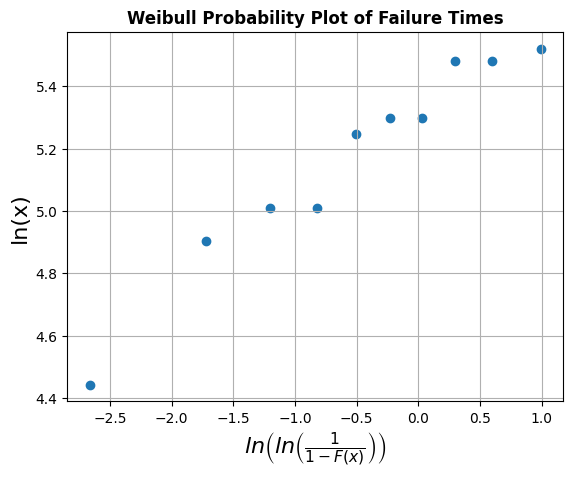

x and y coordinates of the Weibull probability plot (should match the values in the table above):
( -2.6638430853881676 , 4.442651256490317 )
( -1.7232631502768931 , 4.90527477843843 )
( -1.2020231152465504 , 5.0106352940962555 )
( -0.8216665151286872 , 5.0106352940962555 )
( -0.5085953937341485 , 5.247024072160486 )
( -0.23036544473331988 , 5.298317366548036 )
( 0.03292496191433932 , 5.298317366548036 )
( 0.29903293186204805 , 5.480638923341991 )
( 0.5939772166603856 , 5.480638923341991 )
( 0.9926889294902709 , 5.521460917862246 )


In [2]:
data = np.array([85,135,150,150,190,200,200,240,240,250])
y = ln(data)
rank = np.arange(1,data.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
x = ln(-ln(1 - median_rank))

plt.scatter(x,y)
plt.title("Weibull Probability Plot of Failure Times", weight='bold')
plt.xlabel(r'$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$', fontsize=16)
plt.ylabel('ln(x)', fontsize=16)
plt.grid()
plt.show()

print("x and y coordinates of the Weibull probability plot (should match the values in the table above):")
for value in zip(x,y):
    print("( " + str(value[0]) + " , " + str(value[1]) + " )")

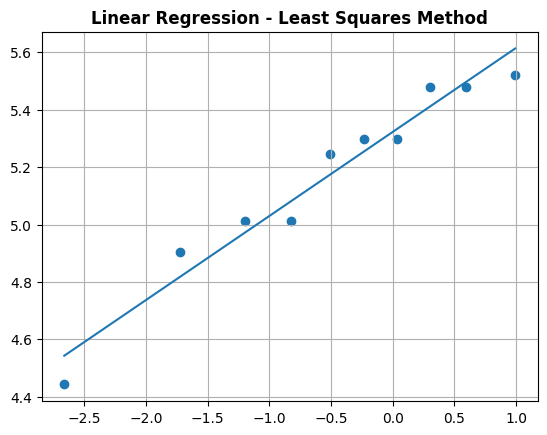

r² value: 0.9539028603991174
shape parameter (k): 3.415950918091105
scale parameter (λ): 204.93601772144896


In [3]:
import scipy.stats as stats # scipy is a statistical package for Python
import math

# Use Scipy's stats package to perform least-squares fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.scatter(x,y)
plt.plot(x,line)
plt.title("Linear Regression - Least Squares Method", weight='bold')
plt.grid()
plt.show()

# Since we plot failure times on the y-axis, the actual slope is inverted
shape = 1/slope
# Since we plot failure times on the y-axis, we want the x-intercept, not the y-intercept
# x-intercept is equal to the negative y-intercept divided by the slope/shape parameter
# Basically you are solving for x: 0 = mx + b, equation of the line where y = 0
x_intercept = - intercept / shape

print("r\u00b2 value:", r_value**2)
print("shape parameter (k):", shape)
scale = math.exp(-x_intercept/slope)
print("scale parameter (\u03BB):", scale)

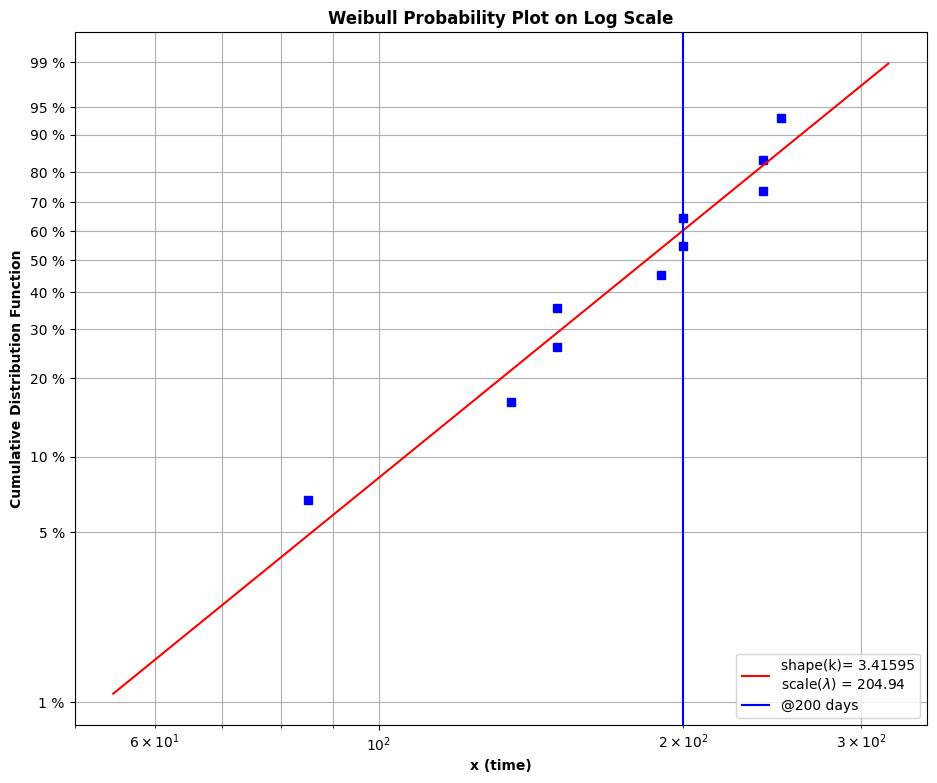

In [4]:
import numpy as np
from numpy import random
from matplotlib.ticker import FuncFormatter

# I'm used to  the ln notation for the natural log
from numpy import log as ln

# Since we are going to plot failure times on log scale, we don't need to take the log of the failure times
x = data
rank = np.arange(1,x.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
y = ln(-ln(1 - median_rank))

# Generate 1000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = scale * random.weibull(shape, size=100)
x_ideal.sort()
F = 1 - np.exp( -(x_ideal/scale)**shape )
y_ideal = ln(-ln(1 - F))

# Weibull plot
fig1 = plt.figure()
fig1.set_size_inches(11,9)
ax = plt.subplot(111)

plt.semilogx(x, y, "bs")
plt.semilogx(x_ideal, y_ideal, 'r-', label="shape(k)= %5G\nscale($\lambda$) = %.5G" % (shape, scale) )
plt.axvline(x = 200, color = 'b', label = '@200 days')
plt.title("Weibull Probability Plot on Log Scale", weight="bold")
plt.xlabel('x (time)', weight="bold")
plt.ylabel('Cumulative Distribution Function', weight="bold")
plt.legend(loc='lower right')

# Generate ticks
def weibull_CDF(y, pos):
    return "%G %%" % (100*(1-np.exp(-np.exp(y))))

formatter = FuncFormatter(weibull_CDF)
ax.yaxis.set_major_formatter(formatter)

yt_F = np.array([ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
yt_lnF = ln( -ln(1-yt_F))
plt.yticks(yt_lnF)
ax.yaxis.grid()
ax.xaxis.grid(which='both')
plt.show()

From the plot above, we see that after 200 days, approximately 60% of the batteries would have failed.

#### We can also plot the Weibull CDF in 1-to-1 scale and get the % failed

Again, the equation for the 2-parameter Weibull cumulative distribution function (CDF) is:

$\huge{F(x) = 1 - e^{(\frac{x}{\lambda})^k}}$,

where $k$ is the shape parameter and $\lambda$ is the scale parameter

Below is Python script to plot the Weibull CDF based on the shape and scale parmeters that we calculated from our battery failure data:

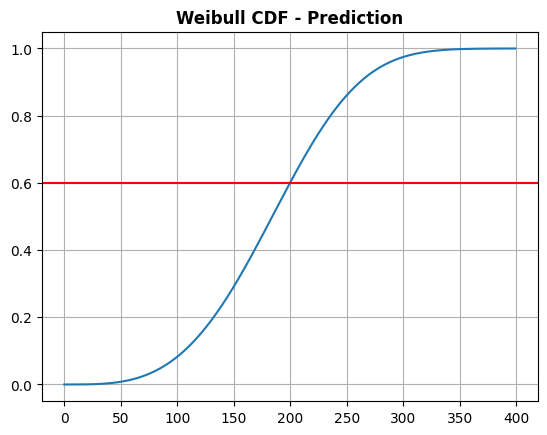

In [5]:
x2 = np.arange(0,400)
y2 = 1-np.exp(-(x2/scale)**shape) # This is the equation for Weibull CDF as illustrated above

plt.plot(x2,y2)
plt.axhline(y = 0.6, color = 'r')
plt.title("Weibull CDF - Prediction",weight='bold')
plt.grid()
plt.show()

#### Now, back to our original question to answer:

<center><h3>Let's say we were to model car battery failures and we assume the failures follow a Weibull distribution.  &nbsp;It allows us to answer questions such as "What percent of the batteries will have failed after 200 days?"</h3></center>

**Answer:** 60%

# Part 2: Failure Forecasting with Right Censored Data

What do we mean when we say "right censored data"?  What this means is we did not have all the time in the world and stopped the experiment before all of our units have failed.  In other words, I stopped when there were units that have not failed yet.  Why the term "right"?  If you imagine the x axis as the time scale, then the actual failure time of the unfailed units are somewhere to the right.  Makes sense right?  Units that have not failed yet or failed with a different failure mode of interest are also called "suspensions" or "suspended" units.

To illustrate, let's load some sample data which includes right censored data.

In [6]:
import pandas
import numpy as np

# Open csv file
df = pandas.read_csv('Weibull_Suspensions.csv')
# Ensure that the data is sorted by DTF in ascending order
df.sort_values(by="DTF")
print("What the CSV data looks like:")
df

What the CSV data looks like:


,VIN,DTF,STATUS
0,6,10,SUSPENDED
1,1,30,FAILED
2,7,45,SUSPENDED
3,2,49,FAILED
4,3,82,FAILED
5,4,90,FAILED
6,5,96,FAILED
7,8,100,SUSPENDED


In our data set above, we have 8 units, 5 of which failed, 3 of which are suspensions or suspended.

To perform failure forecasting with suspended units, the analysis workflow is the same as before, but this time, we need to use a different version for the Bernard's equation for median ranks, where we need to calculated what is known as the adjusted rank:

<center>$\large{Adjusted Rank = \frac{(Reverse Rank)(Previous AdjustedRank)+(N+1)}{(Reverse Rank)+1}}$</center>

#### Let's add the necessary data elements: `rank`, `rev_rank`, `adj_rank`, and `median_rank`

In [7]:
# Make sure the data set is sorted by DTF in ascending order
df.sort_values(by="DTF")

global prev_adj_rank
prev_adj_rank = [0]

def adj_rank(series):
    if series["STATUS"] == "SUSPENDED":
        return "SUSPENSION"
    else:
        adjusted_rank = (series["REV_RANK"] * 1.0 * prev_adj_rank[-1] + (len(df) + 1))/(series["REV_RANK"] + 1)
        prev_adj_rank.append(adjusted_rank)
        return adjusted_rank
        
def median_rank(series):
    if series["ADJ_RANK"] == "SUSPENSION":
        return np.nan
    else:
        median_rank = (series["ADJ_RANK"] - 0.3)/(len(df) + 0.4)
        return median_rank

df["RANK"]=df.index+1
df["REV_RANK"]=len(df)+1-df["RANK"]
df["ADJ_RANK"] = df.apply(adj_rank,axis=1)
df["MEDIAN_RANK"] = df.apply(median_rank, axis=1)

#### What the data looks like with the 4 additional columns(\"NaN\"=Not A Number):

In [8]:
df

,VIN,DTF,STATUS,RANK,REV_RANK,ADJ_RANK,MEDIAN_RANK
0,6,10,SUSPENDED,1,8,SUSPENSION,NaN
1,1,30,FAILED,2,7,1.125,0.098214
2,7,45,SUSPENDED,3,6,SUSPENSION,NaN
3,2,49,FAILED,4,5,2.4375,0.254464
4,3,82,FAILED,5,4,3.75,0.410714
5,4,90,FAILED,6,3,5.0625,0.566964
6,5,96,FAILED,7,2,6.375,0.723214
7,8,100,SUSPENDED,8,1,SUSPENSION,NaN


#### Since we are plotting only units that failed, we want to filter our final data set to included just failed units:

In [9]:
df_final = df[df.STATUS == "FAILED"]
df_final

,VIN,DTF,STATUS,RANK,REV_RANK,ADJ_RANK,MEDIAN_RANK
1,1,30,FAILED,2,7,1.125,0.098214
3,2,49,FAILED,4,5,2.4375,0.254464
4,3,82,FAILED,5,4,3.75,0.410714
5,4,90,FAILED,6,3,5.0625,0.566964
6,5,96,FAILED,7,2,6.375,0.723214


#### Like before, let's plot the actual failure times along the y axis

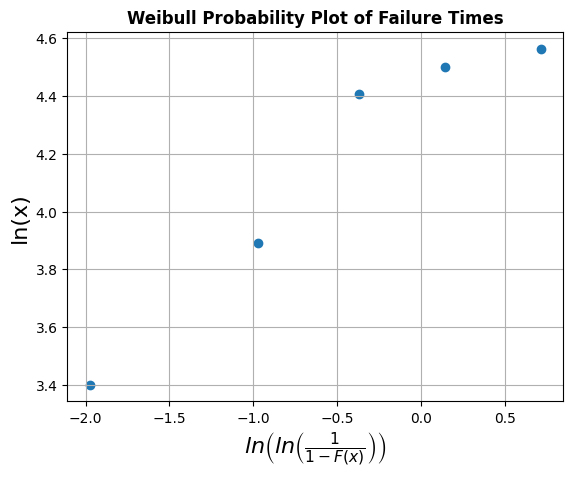

x and y coordinates of the Weibull probability plot (should match the values in the table above):
( -1.9744586943793727 , 3.4011973816621555 )
( -0.9726861412053714 , 3.8918202981106265 )
( -0.36651292058166435 , 4.406719247264253 )
( 0.1447673963435997 , 4.499809670330265 )
( 0.7144554862576666 , 4.564348191467836 )


In [10]:
data = df_final['DTF'].values
y = ln(data)
rank = np.arange(1,data.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
x = ln(-ln(1 - median_rank))

plt.scatter(x,y)
plt.title("Weibull Probability Plot of Failure Times", weight='bold')
plt.xlabel(r'$ln\left(ln\left(\frac{1}{1-F(x)}\right)\right)$', fontsize=16)
plt.ylabel('ln(x)', fontsize=16)
plt.grid()
plt.show()

print("x and y coordinates of the Weibull probability plot (should match the values in the table above):")
for value in zip(x,y):
    print("( " + str(value[0]) + " , " + str(value[1]) + " )")

#### Then apply linear regression on the failure times

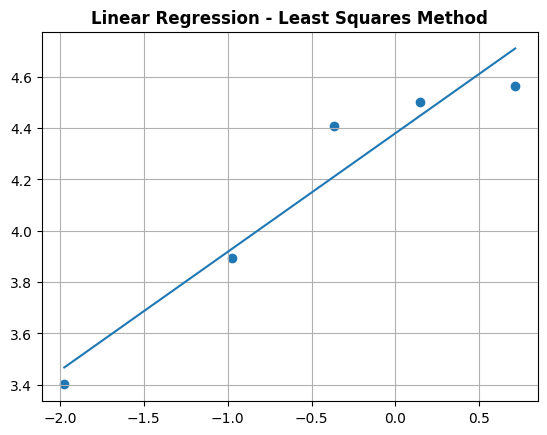

r² value: 0.930704715672923
shape parameter (k): 2.1646383095308175
scale parameter (λ): 79.80247157790899


In [11]:
import scipy.stats as stats # scipy is a statistical package for Python
import math

# Use Scipy's stats package to perform least-squares fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

line = slope*x+intercept
plt.scatter(x,y)
plt.plot(x,line)
plt.title("Linear Regression - Least Squares Method", weight='bold')
plt.grid()
plt.show()

# Since we plot failure times on the y-axis, the actual slope is inverted
shape = 1/slope
# Since we plot failure times on the y-axis, we want the x-intercept, not the y-intercept
# x-intercept is equal to the negative y-intercept divided by the slope/shape parameter
# Basically you are solving for x: 0 = mx + b, equation of the line where y = 0
x_intercept = - intercept / shape

print("r\u00b2 value:", r_value**2)
print("shape parameter (k):", shape)
scale = math.exp(-x_intercept/slope)
print("scale parameter (\u03BB):", scale)

#### Now that we have the scale and shape parameter, let's plot the Weibull probability plot in log scale

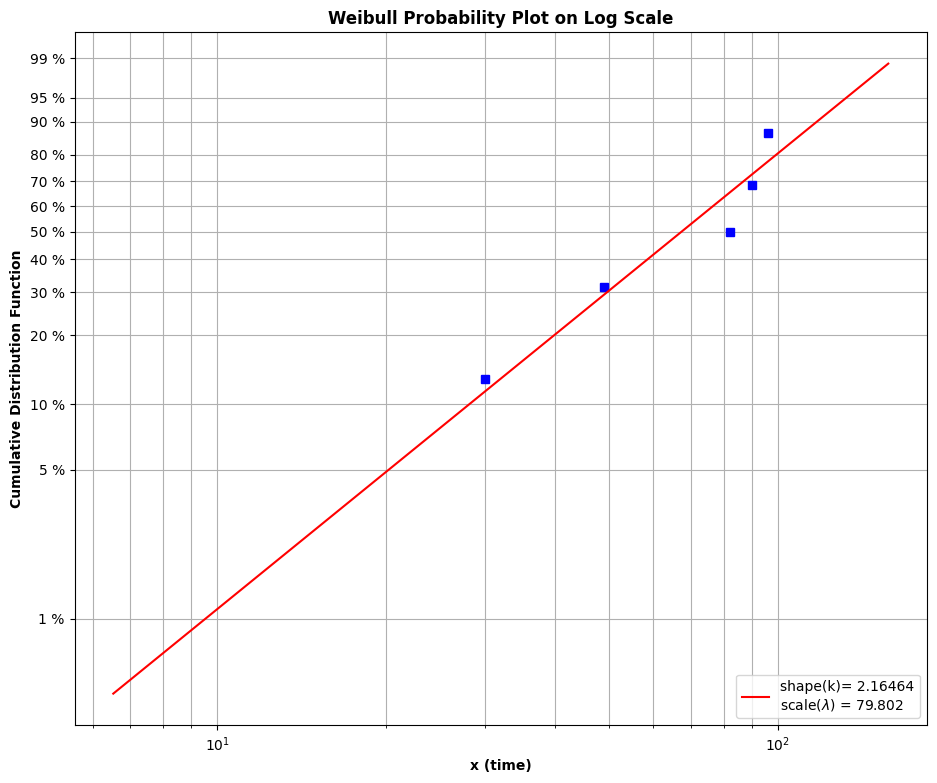

In [12]:
import numpy as np
from numpy import random
from matplotlib.ticker import FuncFormatter

# I'm used to  the ln notation for the natural log
from numpy import log as ln

# Since we are going to plot failure times on log scale, we don't need to take the log of the failure times
x = data
rank = np.arange(1,x.size+1)  # ranks = {1, 2, 3, ... 10}
median_rank = (rank - 0.3)/(rank.size + 0.4)
y = ln(-ln(1 - median_rank))

# Generate 1000 numbers following a Weibull distribution that we think ideally fits our data using the shape and scale parameter
x_ideal = scale * random.weibull(shape, size=100)
x_ideal.sort()
F = 1 - np.exp( -(x_ideal/scale)**shape )
y_ideal = ln(-ln(1 - F))

# Weibull plot
fig1 = plt.figure()
fig1.set_size_inches(11,9)
ax = plt.subplot(111)

plt.semilogx(x, y, "bs")
plt.semilogx(x_ideal, y_ideal, 'r-', label="shape(k)= %5G\nscale($\lambda$) = %.5G" % (shape, scale) )
plt.title("Weibull Probability Plot on Log Scale", weight="bold")
plt.xlabel('x (time)', weight="bold")
plt.ylabel('Cumulative Distribution Function', weight="bold")
plt.legend(loc='lower right')

# Generate ticks
def weibull_CDF(y, pos):
    return "%G %%" % (100*(1-np.exp(-np.exp(y))))

formatter = FuncFormatter(weibull_CDF)
ax.yaxis.set_major_formatter(formatter)

yt_F = np.array([ 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
           0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
yt_lnF = ln( -ln(1-yt_F))
plt.yticks(yt_lnF)
ax.yaxis.grid()
ax.xaxis.grid(which='both')
plt.show()

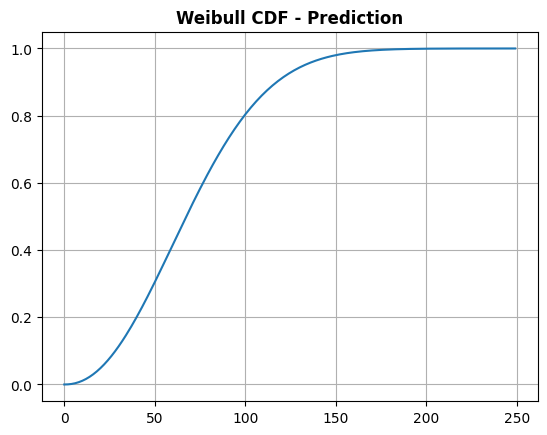

In [13]:
shape = 2.16464
scale = 79.802
x = np.arange(0,250)
y = 1-np.exp(-(x/scale)**shape) # This is the equation for Weibull CDF as illustrated above

plt.plot(x,y)
plt.title("Weibull CDF - Prediction",weight='bold')
plt.grid()
plt.show()

# Part 3: Failure Forecasting with Maximum Likelihood Estimation (MLE) of Weibull Parameters

WARNING: Using this methodology is mathematically intensive.

#### To solve for our shape parameter (k) using MLE, we need to solve for this equation below:

<center>$\huge{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}=\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}-\frac{1}{k}\approx0}$</center>

<center>Where $x_i$ is the ith failure time,</center>

<center>r is the number of failures,</center>

<center>and n is the total number of failure times, both failed and suspended</center>

#### The equation above basically means we need to find a value of k such that the left of the equation equals the right equation or in other words, the value of k such that the difference between the left of the equation and right of the equation is as close to zero as possible.  Once we find the value of k, the scale parameter can be calculated as:

<center>$\large{\lambda=\left(\sum\limits_{i=1}^n \frac{(x_i)^k}{r}\right)^\frac{1}{k}}$</center>

Using our previous sample data, let's calculate the left side of the equation $\left(\large{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}}\right)$:

In [14]:
df = pandas.read_csv('Weibull_Suspensions.csv')

In [15]:
df.head()

,VIN,DTF,STATUS
0,6,10,SUSPENDED
1,1,30,FAILED
2,7,45,SUSPENDED
3,2,49,FAILED
4,3,82,FAILED


In [17]:
df_failed = df[df.STATUS=='FAILED']

dtf_failed = df_failed["DTF"].values

def ln_x_div_r(series):
    return ln(series["DTF"])/len(df_failed)

left_eq_sum = np.sum( ln(dtf_failed)/len(df_failed) )

df_failed = df_failed.assign(ln_x_div_r=df_failed.apply(ln_x_div_r, axis=1))

df_failed

,VIN,DTF,STATUS,ln_x_div_r
1,1,30,FAILED,0.680239
3,2,49,FAILED,0.778364
4,3,82,FAILED,0.881344
5,4,90,FAILED,0.899962
6,5,96,FAILED,0.912870


In [18]:
print("Sum of \"ln_x_div_r\" column =", left_eq_sum)

Sum of "ln_x_div_r" column = 4.152778957767027


<center>left side = $\large{\sum\limits_{i=1}^r \frac{ln(x_i)}{r}=4.15278}$</center>

#### The left side of the equation was calculated to be 4.9138.  Next we are going to calculate the right side of the equation using 100,000 values of k ranging from 0.1 to 10 and then substract the result from 4.9138.  Basically, what we are trying to achieve is throw a lot of k values into the right side of the equation, and subtract the result from it from 4.9138 until we find the difference as small or close to zero as possible. 

<center>$\large{4.15278-\left(\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}-\frac{1}{k}\right) \approx 0}$</center>

### This script below will calculate the 100,000 values that represent the difference of the left side and right side of the equation:

In [19]:
%%time
dtf_all = df["DTF"].values

# Generate 10,0000 k values that is between 0.1 and 10
# Can't use 0 because it is not a valid value in the right-side equation formula, so we're using 0.1 instead
k = np.linspace(0.1,5,100000,endpoint=True)

right = []
for value in k:
    right_eq = np.sum( dtf_all**value * ln(dtf_all) ) / np.sum( dtf_all**value ) - (1/value)
    right.append(right_eq)
    
right_values = np.array(right)

diff = right_values - left_eq_sum

CPU times: total: 641 ms
Wall time: 2.07 s


#### Let's plot the 100,000 difference values and their corresponding k values:

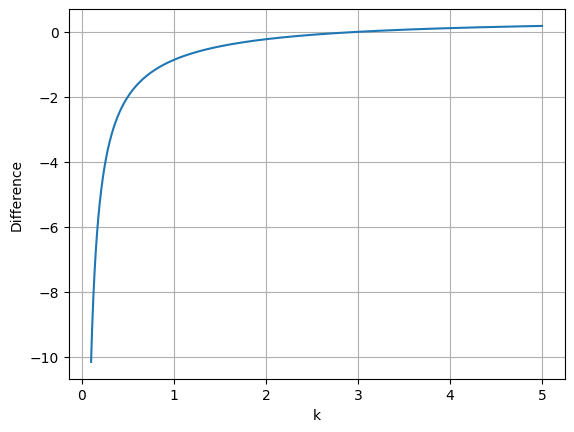

In [20]:
plt.plot(k,diff)
plt.ylabel("Difference")
plt.xlabel("k")
plt.grid()
plt.show()

#### As I've already mentioned, we need to choose a k value where the difference between the left equation and right equation is close to 0 as possible.  From the plot above, it looks like it would be approximately 3.  But instead of trying to "eye-ball it", let's calculate a more precise value for k where the difference is as close to zero as possible:

In [21]:
ks = np.array(k)
diffs = np.array(diff)

d = {'k' : ks,
     'diff' : diffs}
    
df_k_diff = pandas.DataFrame(d, index=np.arange(1,ks.size+1)) # Create one-based index instead of zero-based
df_k_diff = df_k_diff.sort_index(axis=1, ascending=False)  # Re-sorting the columns so that k column in on the left

print("What the k values and their diffs look like:")
print(df_k_diff.head())
print(df_k_diff.tail(), "\n")

print("The row with the first smallest difference:")
k_with_smallest_diff = df_k_diff[ (df_k_diff["diff"] >= 0.000001)][0:1]
print(k_with_smallest_diff, "\n")

final_k = k_with_smallest_diff["k"].values
k_final = final_k[0]
print("Therefore, the k value we should use where the difference is as close to zero is:", k_final)

What the k values and their diffs look like:
          k       diff
1  0.100000 -10.165830
2  0.100049 -10.160908
3  0.100098 -10.155991
4  0.100147 -10.151078
5  0.100196 -10.146170
               k      diff
99996   4.999804  0.179159
99997   4.999853  0.179161
99998   4.999902  0.179164
99999   4.999951  0.179166
100000  5.000000  0.179169 

The row with the first smallest difference:
              k      diff
59532  3.017048  0.000004 

Therefore, the k value we should use where the difference is as close to zero is: 3.017048170481705


Below is the same plot as above, but with the `3.017` reference line added:

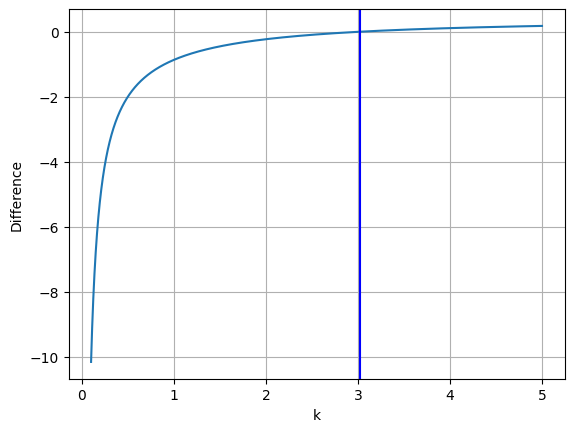

In [22]:
plt.plot(k,diff)
plt.ylabel("Difference")
plt.axvline(x = 3.017, color = 'b')
plt.xlabel("k")
plt.grid()
plt.show()

#### OK so now that we solved for k, we can solve for the scale ($\lambda$) parameter next:

<center>$\large{\lambda=\left(\sum\limits_{i=1}^n \frac{(x_i)^k}{r}\right)^\frac{1}{k}}$</center>

In [23]:
l = (np.sum((dtf_all**k_final)/len(df_failed)))**(1/k_final)
print("scale parameter:",l)

scale parameter: 87.95629822095681


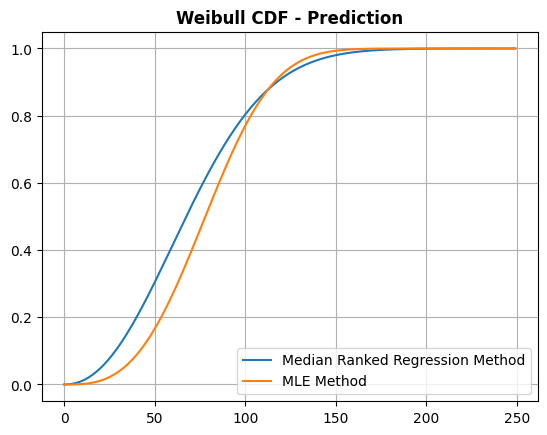

In [24]:
# Median Ranked Regression Parameters
shape1 = 2.16464
scale1 = 79.802
x1 = np.arange(0,250)
y1 = 1-np.exp(-(x/scale1)**shape1) # This is the equation for Weibull CDF

# MLE Parameters
shape2 = 3.017
scale2 = 87.956
x2 = np.arange(0,250)
y2 = 1-np.exp(-(x2/scale2)**shape2) # This is the equation for Weibull CDF

plt.plot(x1,y1, label='Median Ranked Regression Method')
plt.plot(x2,y2, label='MLE Method')
plt.title("Weibull CDF - Prediction",weight='bold')
plt.grid()
plt.legend(loc='lower right')
plt.show()

# Ranked Regression versus MLE: Which one should we use?

- When you have smallish failure data (< 20), go with ranked regression
- When you have large failure data, go with MLE method

In [25]:
dtf_all

array([ 10,  30,  45,  49,  82,  90,  96, 100], dtype=int64)

### AMMENDMENT:

#### After some research, I found out that the method that I used to calculate the shape parameter is very inefficient since it is basically brute force method.  It turns out that, I can use Newton-Raphson method which will find the shape parameter MUCH faster.

<center><h3>Newton-Raphson Method:</h3></center><br>
<center>$\huge{X_{n+1}=X_n-\frac{f(x)}{f'(x)}}$</center><br>
<center>where $X_n$ is an arbitrary initial value,</center><br>
<center>f(x) in our case is equal to our MLE equation above:</center><br>
<center>$\large{f(x)=\sum\limits_{i=1}^r \frac{ln(x_i)}{r}+\frac{1}{k}-\frac{\sum\limits_{i=1}^n (x_i)^kln(x_i)}{\sum\limits_{i=1}^n (x_i)^k}}$</center><br>
Due to the tediousness of the equation for f(x), some arbitrary variables (A,B,C,H) were used to simplify the Newton-Raphson equation:<br>
<center>$\huge{k_{n+1}=k_n+\frac{A+\frac{1}{k_n}-\frac{C_n}{B_n}}{\frac{1}{k_n^2}+\frac{(B_nH_n-C_n^2)}{B_n^2}}}$</center><br><br>
<center>where</center><br><center>$A=\sum\limits_{i=1}^r \frac{ln(x_i)}{r}$ &nbsp;,&nbsp;&nbsp;&nbsp;&nbsp; $B=\sum\limits_{i=1}^n x_i^{k_n}$&nbsp;,&nbsp;&nbsp; $C=\sum\limits_{i=1}^n (x_i)^{k_n}\space ln(x_i)$</center><br>
<center>and</center><br>
<center>$H=\sum\limits_{i=1}^n x_i^{k_n}(lnx_i)^2$</center><br><br>
<h3>But what do we use for the initial k value($k_n$)?</h3><br>
It has been suggested to use the following:<br>
<center>$k_n=\left[\frac{\frac{6}{\pi^2}\left[\sum\limits_{i=1}^n (lnx_i)^2-\left(\sum\limits_{i=1}^n lnx_i\right)^2/n\right]}{n-1} \right]^{-\frac{1}{2}}$</center><br>
Supposedly using this equation, we will get the shape parameter on average after 3.5 iterations to achieve 4-place accuracy.

#### Below is the translation of those equations above into Python equivalent code and interating Newton-Raphson method 10 times:

In [26]:
%%time
# give initial value for the shape paramter:
shape = (( (6.0/np.pi**2)*(np.sum(ln(dtf_all)**2) - ((np.sum(ln(dtf_all)))**2)/dtf_all.size) ) / (dtf_all.size-1))**-0.5
for i in range(1,11):
    A = np.sum(ln(dtf_failed) * 1.0)/dtf_failed.size
    B = np.sum(dtf_all**shape)
    C = np.sum( (dtf_all**shape) * ln(dtf_all) )
    H = np.sum( (dtf_all**shape) * (ln(dtf_all))**2 )
    shape = shape + (A+(1.0/shape) - (C/B)) / ( (1.0/shape**2) + ( (B*H)-C**2 ) / B**2 )
    print("shape"+str(i)+" "+str(shape))

shape1 2.3994173367965277
shape2 2.893252898678388
shape3 3.0119648850818037
shape4 3.017010101717311
shape5 3.0170185648604697
shape6 3.017018564884203
shape7 3.017018564884203
shape8 3.017018564884203
shape9 3.017018564884203
shape10 3.017018564884203
CPU times: total: 0 ns
Wall time: 0 ns


#### From above, we see that after only 4 iterations, the Newton-Raphson method converged to the shape parameter of 3.017, which is very close to the shape parameter value obtained earlier using the inefficient brute-force method.

# Next Steps...

- Create functions to streamline the failure forecasting
- Create Graphical User Interface (GUI) such that a user can upload a csv file containing failure data and then the application generates the relevant plots and predictions